# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

You will be required to follow the data science lifecycle to fulfill the objective. The data science lifecycle (https://www.datascience-pm.com/crisp-dm-2/) includes:

- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment.

You now know the CRoss Industry Standard Process for Data Mining (CRISP-DM), have an idea of the business needs and objectivess, and understand the data. Next is the tedious task of preparing the data for modeling, modeling and evaluating the model. Luckily, just like EDA the first of the two phases can be automated. But also, just like EDA this is not always best. 


In this task you will be get a taste of AutoML and Bespoke ML. In the notebook we make use of the library auto-sklearn/autosklearn (https://www.automl.org/automl/auto-sklearn/) for AutoML and sklearn for ML. We will use train one machine for the traditional approach and you will be required to change this model to any of the models that exist in sklearn. The model we will train will be a Logistic Regression. Parts of the data preparation will be omitted for you to do, but we will provide hints to lead you in the right direction.

The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

There are many AutoEDA Python libraries out there which include:

- dtale (https://dtale.readthedocs.io/en/latest/)
- pandas profiling (https://pandas-profiling.ydata.ai/docs/master/index.html)
- autoviz (https://readthedocs.org/projects/autoviz/)
- sweetviz (https://pypi.org/project/sweetviz/)

and many more. In this task we will use Sweetviz.. You may be required to use bespoke EDA methods.

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

Run the AutoML section and then fill in code for the traditional ML section for the the omitted cells.

Please note that the notebook you submit must include the analysis you did in Task 2.













## Import Libraries




In [ ]:
# !pip install sweetviz 
#uncomment the above if you need to install the library 
pip install auto-sklearn
#uncomment the above if you need to install the library 

In [2]:
# !pip install --upgrade scipy

In [188]:
import pandas as pd
import numpy as np
#import autosklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 
#import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

## Import Datasets

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [34]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Part One

## EDA

### Sweetviz

#### Whole dataset

In [ ]:
#autoEDA = sweetviz.analyze(df)
#autoEDA.show_notebook()

#### Training Dataset

In [ ]:
#autoEDA = sweetviz.analyze(train)
#autoEDA.show_notebook()

### Your Own EDA 

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
train.Loan_Status.isnull().sum()

0

In [44]:
train.Loan_Status.shape

(614,)

In [51]:
test.shape

(367, 12)

In [80]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [88]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [89]:
test.isnull().sum().sum()

84

In [87]:
test[test.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [76]:
train1=train.drop('Loan_Status',axis=1)

In [61]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test

In [52]:
train.shape

(614, 13)

In [79]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [86]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
train.isnull().sum().sum()

149

In [83]:
train[train.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [90]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

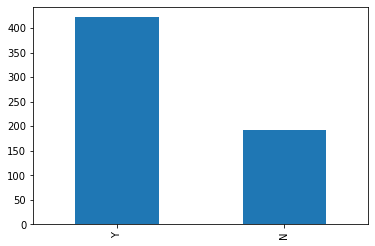

In [92]:
train.Loan_Status.value_counts().plot(kind='bar')
plt.show()

In [95]:
np.corrcoef(df["ApplicantIncome"],df["LoanAmount"])

array([[ 1., nan],
       [nan, nan]])

In [96]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


In [97]:
df1 = df[['Self_Employed', 'ApplicantIncome']]
gr1 = df1.groupby(df1['Self_Employed']).mean()
gr1

,ApplicantIncome
Self_Employed,
No,4892.030979
Yes,6912.579832


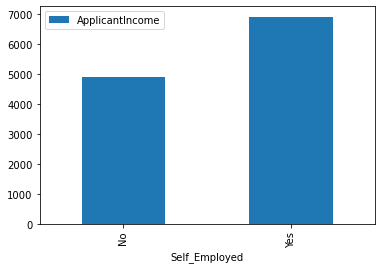

In [98]:
gr1.plot(kind='bar')
plt.show()

In [111]:
Default=df[df['Credit_History']==0]

In [115]:
Default.isnull().sum()

Gender            5
Credit_History    0
dtype: int64

In [114]:
Default.shape

(148, 2)

In [113]:
Default = Default[['Gender', 'Credit_History']]
DefaultGender = Default.groupby(Default['Gender']).count()
DefaultGender

,Credit_History
Gender,
Female,30
Male,113


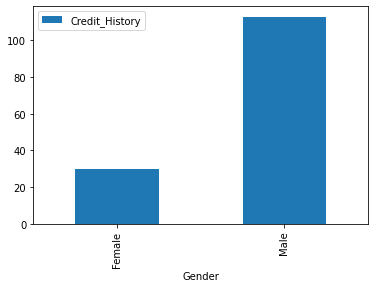

In [116]:
DefaultGender.plot(kind='bar')
plt.show()

In [122]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [144]:
df[df['Dependents']!='0']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
355,LP002932,Male,Yes,3+,Graduate,No,7603,1213.0,197.0,360.0,1.0,Urban
356,LP002935,Male,Yes,1,Graduate,No,3791,1936.0,85.0,360.0,1.0,Urban
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural
361,LP002969,Male,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban


In [147]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [150]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [152]:
grp = train.groupby(['Credit_History','Loan_Status'])
grp.get_group((1,'Y'))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [163]:
train[['Credit_History','Loan_Status']].value_counts()

Credit_History  Loan_Status
1.0             Y              378
                N               97
0.0             N               82
                Y                7
dtype: int64

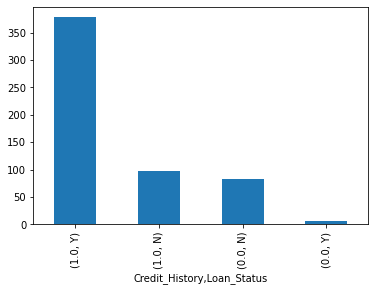

In [158]:
train[['Credit_History','Loan_Status']].value_counts().plot(kind='bar')

plt.show()

In [8]:
x=['Credit_History','Loan_Status']

In [9]:
dftrain=train.loc[:,x]

In [10]:
dftrain

,Credit_History,Loan_Status
0,1.0,Y
1,1.0,N
2,1.0,Y
3,1.0,Y
4,1.0,Y
...,...,...
609,1.0,Y
610,1.0,Y
611,1.0,Y
612,1.0,Y


In [26]:
grp = dftrain.groupby(['Credit_History','Loan_Status'])
grp.get_group((1,'Y')).value_counts()

Credit_History  Loan_Status
1.0             Y              378
dtype: int64

In [27]:
grp1 = dftrain.groupby(['Credit_History','Loan_Status'])
grp1.get_group((0,'Y')).value_counts()

Credit_History  Loan_Status
0.0             Y              7
dtype: int64

In [29]:
grp2 = dftrain.groupby(['Credit_History','Loan_Status'])
grp2.get_group((1,'N')).value_counts()

Credit_History  Loan_Status
1.0             N              97
dtype: int64

In [31]:
grp2 = dftrain.groupby(['Credit_History','Loan_Status'])
grp2.get_group((0,'N')).value_counts()

Credit_History  Loan_Status
0.0             N              82
dtype: int64

In [ ]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train1, test], axis=0)
df.head()

In [78]:
df.shape

(981, 12)

In [53]:
df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [54]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [57]:
df.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [102]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

1.Train data has 614 rows and 13 columns(features) where as test data has 367 rows and 12 columns(features).Both have float and object data types

 2.Both train and test data sets does not have duplicates.Train data has 149 missing values in total and test data has 84 missing values in total

 3.More loans were approved than those who were rejected: Aproved:422  Rejected:192 

 4.113 men defaulted while 30 women defaulted.This implies that more men defaulted as compared to the Woman

 5.436 applicants have dependents

 6.The mean income for those who are self employed is less than those who are employed by other companies.Employed:6912,Self_Employed:579832

 7.Applicants with a credit history who were issued with loans are 378 while those with no credit history who were issued with loans are just 7
  that is 378/614=0.62 vs 7/614=0.011 respectively

 8.There is a moderate positive correlation(0.55) between ApplicantIncome and LoanAmount.This means loan amount increases as income increases


# Part Two

## Auto ML wth autosklearn


In [59]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\trymo\AppData\Local\Temp\ipykernel_3176\812343387.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\trymo\AppData\Local\Temp\ipykernel_3176\812343387.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\trymo\AppData\Local\Temp\ipykernel_3176\812343387.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [39]:
train.shape

(614, 13)

In [ ]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

In [12]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


## Bespoke ML sklearn

### Data Preparation

In [150]:
# Matrix of features

df = train[['Education',
'Property_Area','Gender',
'Married',
'Dependents',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]
X = pd.DataFrame(df, columns=df.columns)
X = pd.get_dummies(X, drop_first=True)

### Include Numerical Features Here ###
### Handle Missing Values Here ###
knn=['LoanAmount','Loan_Amount_Term', 'Credit_History']
X_KNN=X.loc[:,knn]
df1 = X.drop(['LoanAmount','Loan_Amount_Term', 'Credit_History'],axis=1)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_KNN_Imputed=imputer.fit_transform(X_KNN)
X_KNN_Imputeddf= pd.DataFrame(X_KNN_Imputed)

X_KNN_Imputeddf.rename(columns = {0:'LoanAmount',1:'Loan_Amount_Term',2: 'Credit_History'}, inplace = True)

X_Clean= pd.concat([df1,X_KNN_Imputeddf],axis=1)

### Scale Here ###
scaler = StandardScaler()
df_scaled= pd.DataFrame(scaler.fit_transform(X_Clean),columns=X_Clean.columns)




# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(df_scaled, y)
df_final=pd.concat([X_over, y_over ],axis=1)
# # encode with get dummies
X1=df_final.drop(['Loan_Status'],axis=1)
y1=df_final['Loan_Status']

# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [119]:
df_final

,ApplicantIncome,CoapplicantIncome,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.072991,-0.554487,-0.528362,-0.782016,1.428147,0.505592,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.566625,0.274669,0.425927,1
1,-0.134412,-0.038732,-0.528362,-0.782016,-0.700208,0.505592,0.736691,2.240448,-0.443713,-0.300975,-0.392601,-0.782016,-0.700208,-0.199278,0.274669,0.425927,0
2,-0.393747,-0.554487,-0.528362,-0.782016,1.428147,0.505592,0.736691,-0.446339,-0.443713,-0.300975,2.547117,-0.782016,1.428147,-0.933973,0.274669,0.425927,1
3,-0.462062,0.251980,1.892641,-0.782016,1.428147,0.505592,0.736691,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.294077,0.274669,0.425927,1
4,0.097728,-0.554487,-0.528362,-0.782016,1.428147,0.505592,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.045229,0.274669,0.425927,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,-0.310196,-0.554487,-0.528362,-0.782016,1.428147,-1.977878,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.815474,0.274669,-2.401308,0
840,0.753029,-0.554487,-0.528362,-0.782016,-0.700208,0.505592,0.736691,2.240448,-0.443713,-0.300975,2.547117,-0.782016,-0.700208,0.120671,0.274669,0.425927,0
841,-0.533163,0.552609,1.892641,1.278747,-0.700208,-1.977878,0.736691,-0.446339,-0.443713,-0.300975,-0.392601,1.278747,-0.700208,0.393219,0.274669,-2.401308,0
842,-0.584440,11.018211,-0.528362,-0.782016,1.428147,0.505592,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.649575,0.274669,0.425927,0


In [117]:
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [114]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [110]:
df_scaled

,ApplicantIncome,CoapplicantIncome,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,-0.528362,-0.782016,1.428147,0.505592,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.566625,0.274669,0.425927
1,-0.134412,-0.038732,-0.528362,-0.782016,-0.700208,0.505592,0.736691,2.240448,-0.443713,-0.300975,-0.392601,-0.782016,-0.700208,-0.199278,0.274669,0.425927
2,-0.393747,-0.554487,-0.528362,-0.782016,1.428147,0.505592,0.736691,-0.446339,-0.443713,-0.300975,2.547117,-0.782016,1.428147,-0.933973,0.274669,0.425927
3,-0.462062,0.251980,1.892641,-0.782016,1.428147,0.505592,0.736691,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.294077,0.274669,0.425927
4,0.097728,-0.554487,-0.528362,-0.782016,1.428147,0.505592,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,-0.045229,0.274669,0.425927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.528362,-0.782016,-0.700208,-1.977878,-1.357421,-0.446339,-0.443713,-0.300975,-0.392601,-0.782016,-0.700208,-0.874724,0.274669,0.425927
610,-0.212557,-0.554487,-0.528362,-0.782016,-0.700208,0.505592,0.736691,-0.446339,-0.443713,3.322532,-0.392601,-0.782016,-0.700208,-1.242071,-2.520583,0.425927
611,0.437174,-0.472404,-0.528362,-0.782016,1.428147,0.505592,0.736691,2.240448,-0.443713,-0.300975,-0.392601,-0.782016,1.428147,1.281964,0.274669,0.425927
612,0.357064,-0.554487,-0.528362,-0.782016,1.428147,0.505592,0.736691,-0.446339,2.253710,-0.300975,-0.392601,-0.782016,1.428147,0.499868,0.274669,0.425927


In [94]:
X_KNN_Imputeddf.isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [101]:
df_scaled.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
dtype: int64

In [21]:
# some classifiers you can pick from (remember to import)
import sklearn
classifiers = sklearn.utils.all_estimators(type_filter=None)
for name, class_ in classifiers:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
CategoricalNB
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HalvingGridSearchCV
HalvingRandomSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RadiusNeighborsClassifier
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
SelfTrainingClassifier
StackingClassifier
VotingClassifier


In [35]:
X_train.dropna(inplace=True)

In [36]:
X_train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [30]:
y_train.dropna().isnull().sum()

0

### Training the model

In [151]:
# train
clf = LogisticRegression() #change model here
clf.fit(X_train, y_train)

# predict
predictions_clf = clf.predict(X_test)

In [152]:
print('Model Accuracy:', accuracy_score(predictions_clf, y_test))

Model Accuracy: 0.6863905325443787


In [153]:
print(confusion_matrix(predictions_clf, y_test))

[[53 12]
 [41 63]]


In [ ]:
Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

In [156]:
model = RandomForestClassifier()

In [157]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [171]:
# predict
y_pred = model.predict(X_test)

In [173]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8994082840236687
Recall: 0.8666666666666667
Precision: 0.9027777777777778
CL Report:               precision    recall  f1-score   support

           0       0.90      0.93      0.91        94
           1       0.90      0.87      0.88        75

    accuracy                           0.90       169
   macro avg       0.90      0.90      0.90       169
weighted avg       0.90      0.90      0.90       169



In [174]:
print(confusion_matrix(y_pred, y_test))

[[87 10]
 [ 7 65]]


In [176]:
y_pred_proba= model.predict_proba(X_test) [::,1]

In [177]:
false_positive_rate, true_positive_rate,_= metrics.roc_curve(y_test, y_pred_proba)

In [178]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

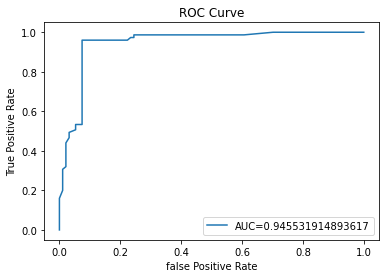

In [179]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)
plt.show()

### Finding good hyper-parameters for Selected model

In [180]:
modelR = RandomForestClassifier() # create model 
modelR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [181]:
%time modelR.fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 300 ms


RandomForestClassifier()

In [183]:
%time pred_test = modelR.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 15.6 ms


In [184]:
%time pred_train = modelR.predict(X_train) 

CPU times: total: 62.5 ms
Wall time: 60.9 ms


In [185]:
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)
print(f'Training accuracy {acc_train: .3f}') # round to 3 decimal places
print(f'Testing accuracy {acc_test: .3f}') # roun

Training accuracy  1.000
Testing accuracy  0.893


#### Finding good hyper-parameters
We shall use *k-fold cross-validation* with training data to find good hyper-parameter values for the model.

In this example we shall perform a search over all combinations of:
- 2 different values of *n_estimators*: (25, 50)
- 2 different values of *max_features*: (15, 20), and
- 2 different values of *max_leaf_nodes*: (8, 16)
- default values for all other hyper-parameters.

In [190]:
tuned_parameters = [{'n_estimators': [25, 50],
                     'max_features': [15, 20],
                     'max_leaf_nodes': [8, 16]}] # hyperparameters to tune

RF = GridSearchCV(RandomForestClassifier(), tuned_parameters, 
                   verbose=1, n_jobs=-1) # grid search model
RF.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(RF.best_params_) # best hyperparameter values

print("\nGrid scores:")
means = RF.cv_results_['mean_test_score'] # mean accuracy with folds
stds = RF.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations 
for mean, std, params in zip(means, stds, RF.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found:
{'max_features': 20, 'max_leaf_nodes': 16, 'n_estimators': 50}

Grid scores:
0.726 (+/-0.045) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 25}
0.713 (+/-0.025) for {'max_features': 15, 'max_leaf_nodes': 8, 'n_estimators': 50}
0.769 (+/-0.065) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 25}
0.767 (+/-0.058) for {'max_features': 15, 'max_leaf_nodes': 16, 'n_estimators': 50}
0.711 (+/-0.048) for {'max_features': 20, 'max_leaf_nodes': 8, 'n_estimators': 25}
0.729 (+/-0.063) for {'max_features': 20, 'max_leaf_nodes': 8, 'n_estimators': 50}
0.759 (+/-0.024) for {'max_features': 20, 'max_leaf_nodes': 16, 'n_estimators': 25}
0.778 (+/-0.048) for {'max_features': 20, 'max_leaf_nodes': 16, 'n_estimators': 50}


Hyperparameter tuning did not improve the results.The original model will be considered

In [191]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8994082840236687


### Model explainability

In [193]:
import shap 

In [194]:
my_model = RandomForestClassifier(random_state=0).fit(X_train,y_train)

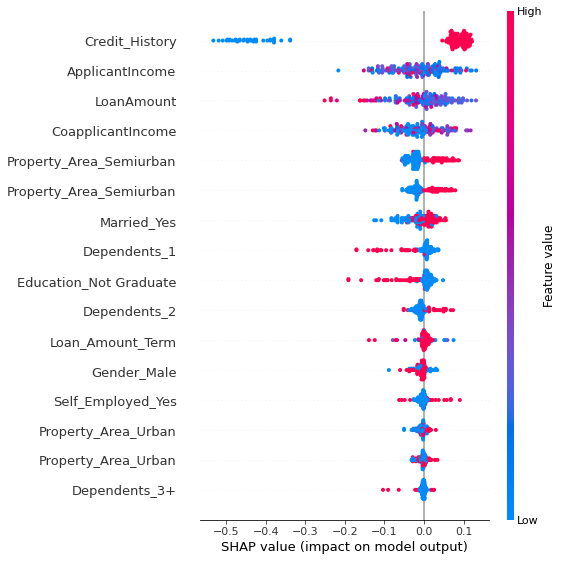

In [195]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values( X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],  X_test)

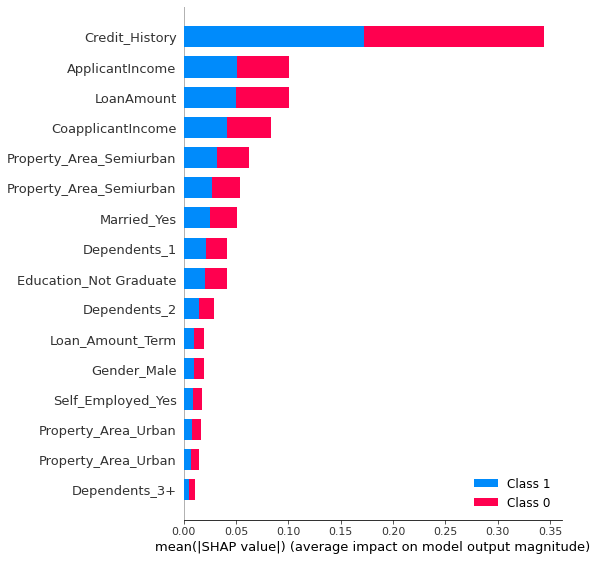

In [197]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Credit history is high significant hence plays a major role in loan decision followed by Applicanticome,loan amount,coapplicanticome and Property area semiurban